In [1]:
import os

ROOT = "/content/drive/MyDrive/Colab Notebooks"
os.chdir(ROOT)


In [2]:
from google.colab import drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

### Load Data

In [4]:
df_rta = pd.read_csv('RTA_Dataset.csv')
df_rta.head(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
5,14:15:00,Friday,31-50,Male,NaN,Unknown,NaN,NaN,NaN,NaN,...,U-Turn,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Overloading,Slight Injury
6,17:30:00,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,NaN,...,Moving Backward,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Other,Slight Injury
7,17:20:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Above 10yr,...,U-Turn,na,na,na,na,NaN,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
8,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,Pedestrian,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,U-Turn,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury


In [5]:
df_rta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [6]:
df_rta.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


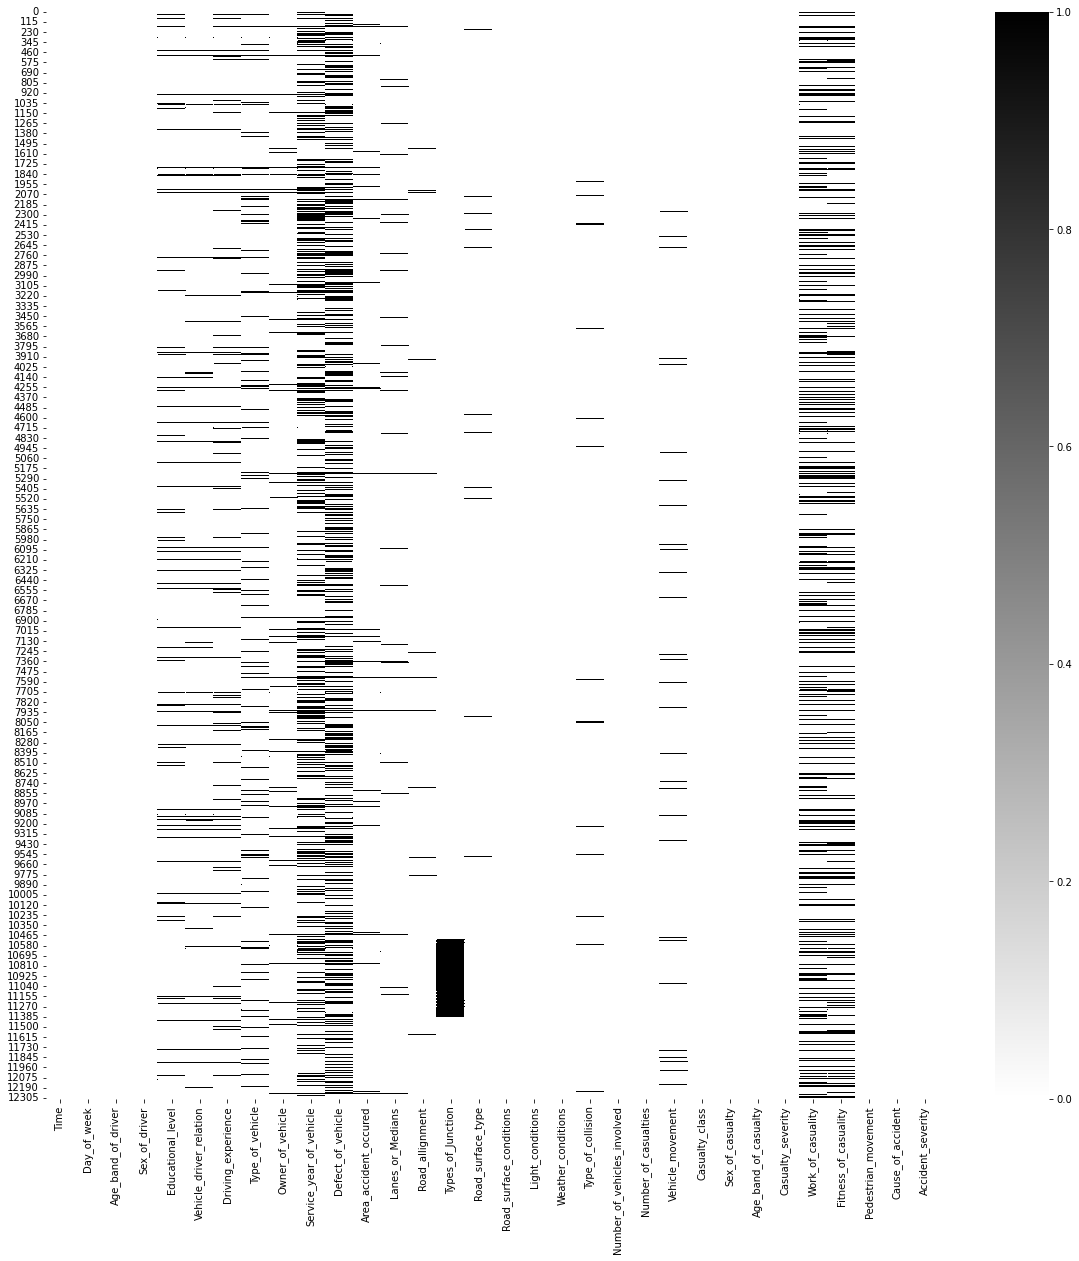

In [7]:
plt.figure(figsize = (20,20))
sns.heatmap(df_rta.isnull(),cmap = 'binary')



## Percentage for the Missing Values

In [8]:
column = []
percentage_missing_values = []
missing_val_cols = []


for col in df_rta.columns:
  column.append(col)
  percentage_missing = (df_rta[col].isnull().sum()/df_rta.shape[0])*100
  percentage_missing_values.append(percentage_missing)
  if df_rta[col].isnull().sum() > 0:
    missing_val_cols.append(col)

df_percent_null_values = pd.DataFrame({"columns" : column , "Percentage" : percentage_missing_values})


In [9]:
df_percent_null_values

,columns,Percentage
0,Time,0.000000
1,Day_of_week,0.000000
2,Age_band_of_driver,0.000000
3,Sex_of_driver,0.000000
4,Educational_level,6.016564
5,Vehicle_driver_relation,4.701202
6,Driving_experience,6.731082
7,Type_of_vehicle,7.713543
8,Owner_of_vehicle,3.913608
9,Service_year_of_vehicle,31.893472


## Percentage of the missing values more that 20%

In [10]:
cols_missing = df_percent_null_values["Percentage"] >= 20

df_percent_null_values[cols_missing]

,columns,Percentage
9,Service_year_of_vehicle,31.893472
10,Defect_of_vehicle,35.945112
27,Work_of_casuality,25.966223
28,Fitness_of_casuality,21.394933


## Categorical Columns with Unique Values

In [11]:
df_rta.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


## The Highlights are summarized below: 
1.) Number of maximum nos of casualties is 2

2.) Maximum nos of the vehicles which are involved are 7

3.) Maximum nos of the people involved in the accident is 8 

In [12]:
df_rta.describe(include = ['O']).T

,count,unique,top,freq
Time,12316,1074,15:30:00,120
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Vehicle_driver_relation,11737,4,Employee,9627
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Service_year_of_vehicle,8388,6,Unknown,2883


## Points to be highlighted here :
1.) Most of the accidents have taken place on Friday.

2.) The drivers who mostly caused the accidents are male

3.) Age Band of the drivers were between 18-30 yrs

4.) The drivers were having 5-10years of exp in driving.

5.) Accidents mostly happened in broadday light

6.) The fitness of the casualties were mostly normal.



In [13]:
## Checking for the duplicated rows

df_rta[df_rta.duplicated()].isnull()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36059ce7d0>,
      dtype=object)

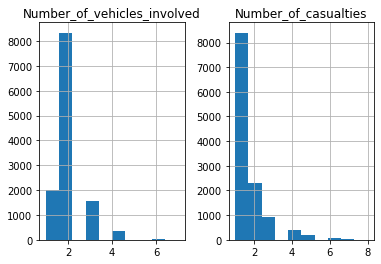

In [14]:
df_rta.hist()

In [15]:
df_rta.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


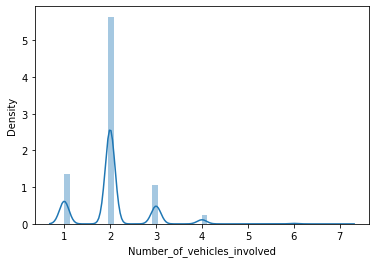

In [16]:
## plotting the graph to the check the distplot on the numerical columns

sns.distplot(df_rta["Number_of_vehicles_involved"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


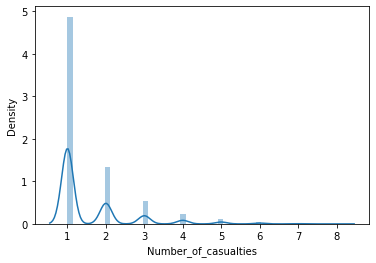

In [17]:
sns.distplot(df_rta["Number_of_casualties"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([   0,    1,    2, ..., 1071, 1072, 1073]),
 <a list of 1074 Text major ticklabel objects>)

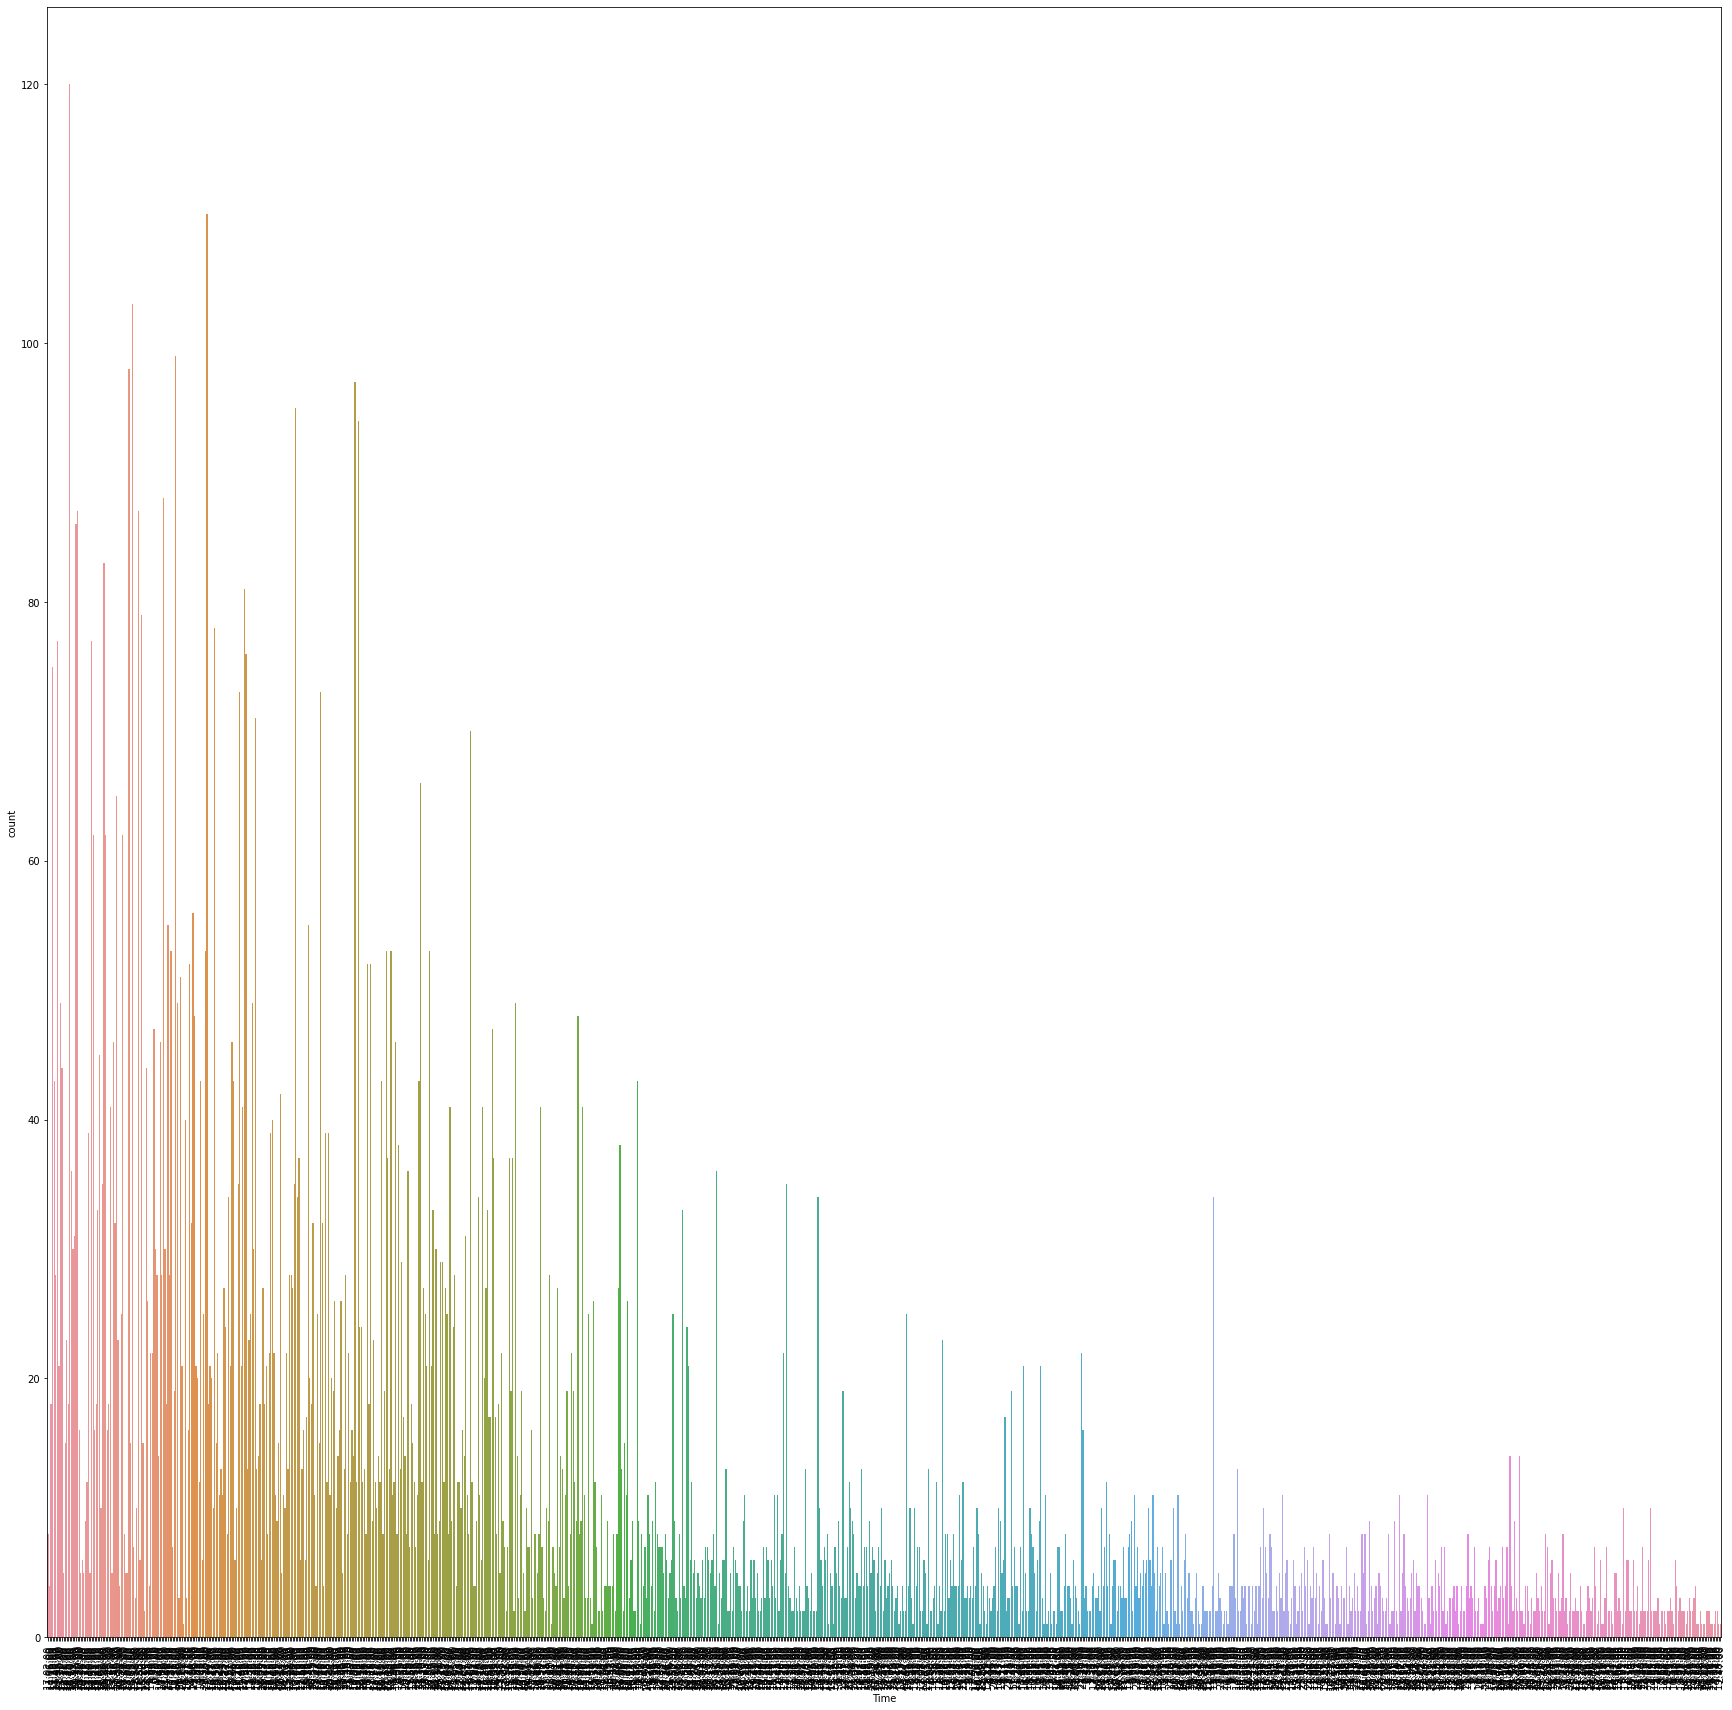

In [18]:
## Determining time through countplot
plt.figure(figsize=(30,30))
sns.countplot(df_rta["Time"])
plt.xticks(rotation=90)

In [19]:
## Converting this to date time values 

def convert_time(x):
  return (int(x.split(':')[0]))

df_rta['Time'] = df_rta['Time'].apply(convert_time)


In [20]:
df_rta

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [21]:
def categorizetime(x):
    if x >=6 and x < 18 :
        return('Day')
    elif x < 6 or x >= 18:
        return('Night')
df_rta['Time'] = df_rta['Time'].apply(categorizetime)


In [22]:
df_rta

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Day,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,Day,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,Day,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Night,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Night,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Day,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,Night,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,Day,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,Day,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [23]:
df_rta['Time'].unique()

array(['Day', 'Night'], dtype=object)

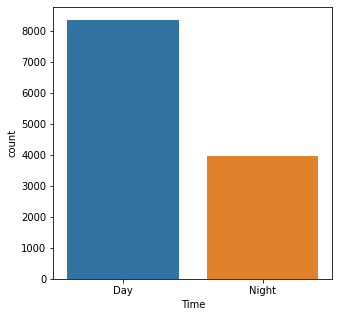

In [24]:
plt.figure(figsize=(5,5))
sns.countplot(x=df_rta['Time'])

In [25]:
def Catagorical_col(col_values):
  print(f"Null Values : {df_rta[col_values].isnull().sum()}")
  print(f"Unique Values : {df_rta[col_values].unique()}")
  sns.countplot(x = df_rta[col_values])
  plt.xticks(rotation = 90)
  plt.show()

Null Values : 0
Unique Values : ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']


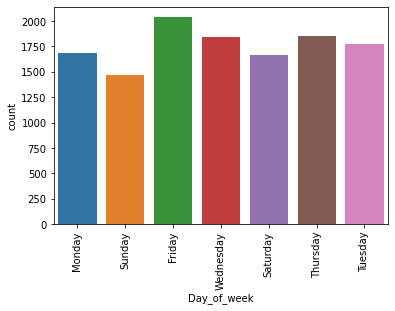

In [26]:
Catagorical_col("Day_of_week")

In [27]:
cat_cols = df_rta.select_dtypes(include = 'object').columns
cat_cols

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

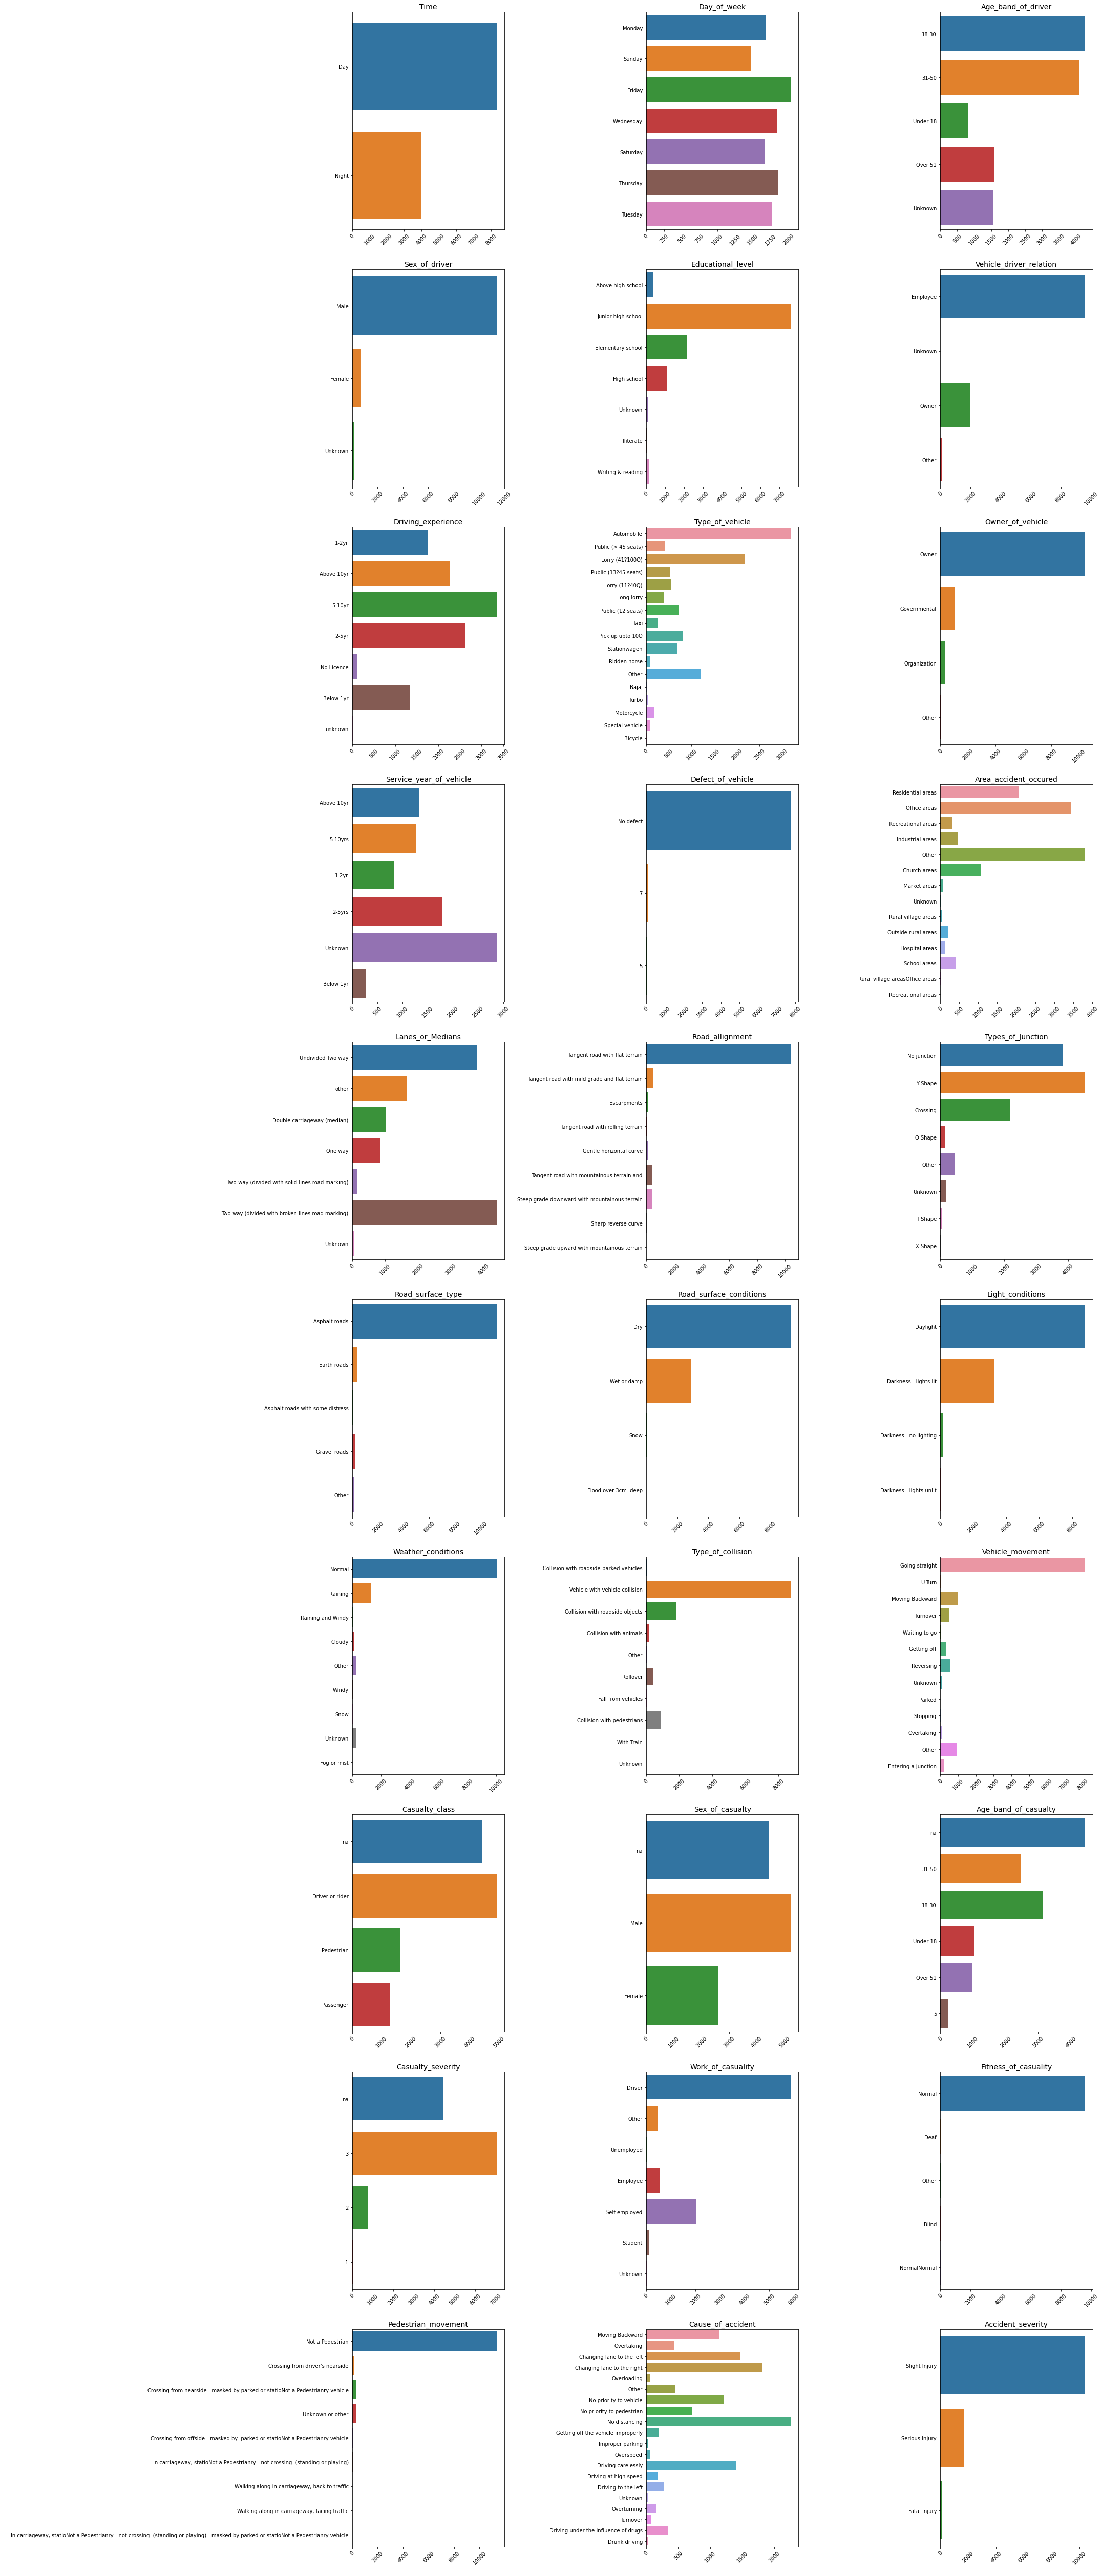

In [28]:
plt.figure(figsize = (30,70))
for i in enumerate(cat_cols):
    plt.subplot(10,3,i[0]+1)
    sns.countplot(y = i[1], data = df_rta)
    plt.xticks(rotation = 45)
    plt.title(i[1], fontsize = 14)
    plt.xlabel(' ')
    plt.ylabel(' ')
    plt.tight_layout()


## Checking for the Target Columns

Null Values : 0
Unique Values : ['Slight Injury' 'Serious Injury' 'Fatal injury']


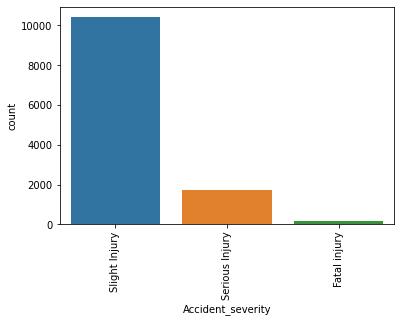

In [29]:
Catagorical_col("Accident_severity")

## Data Preprocessing

In [30]:
## Checking for the null values

df_rta.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [31]:
num_cols = df_rta.dtypes[df_rta.dtypes == "int64"].index.tolist()
cat_cols = df_rta.dtypes[df_rta.dtypes != "int64"].index.tolist()

In [32]:
df_rta[cat_cols]

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Day,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,Day,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,Day,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Night,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Night,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Day,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,Night,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,Day,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,Day,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [33]:
## Drop the columns that can cause the imbalance during the imputation

df_rta.drop(columns=['Service_year_of_vehicle', 'Defect_of_vehicle','Work_of_casuality', 'Fitness_of_casuality'], inplace = True)

In [34]:
def replace_missing_val_mode(df_rta, col):
  df_rta[col].fillna(value = df_rta[col].mode()[0], inplace = True)
  return df_rta

In [35]:
for col in df_rta.columns:
  if df_rta[col].dtype == 'object':
    df_rta = replace_missing_val_mode(df_rta, col)


In [36]:
df_rta.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [37]:
df_rta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Area_accident_occured        12316 non-null  object
 10  Lanes_or_Medians             12316 non-null  object
 11  Road_allignment              12316 non-null  object
 12  Types_of_Junction            12316 non-null  object
 13  Road_surface_type            12

## Encoding the Catagorical Column

In [38]:
def ordinal_encoder(df, feats): 
  for feat in feats:    
    feat_val = list(1+np.arange(df[feat].nunique()))
    feat_key = list(df[feat].sort_values().unique())
    feat_dict = dict(zip(feat_key, feat_val))
    df[feat] = df[feat].map(feat_dict)
  return df

df_rta = ordinal_encoder(df_rta, df_rta.drop(['Accident_severity'], axis=1).columns)


In [39]:
df_rta

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,1,2,1,2,1,1,1,1,4,10,...,2,2,3,4,3,6,4,6,10,Slight Injury
1,1,2,2,2,5,1,4,12,4,7,...,2,2,3,4,3,6,4,6,17,Slight Injury
2,1,2,1,2,5,1,1,6,4,2,...,2,2,3,1,2,2,3,6,1,Serious Injury
3,2,4,1,2,5,1,3,12,1,7,...,2,2,3,3,1,1,3,6,2,Slight Injury
4,2,4,1,2,5,1,2,1,4,5,...,2,2,3,4,3,6,4,6,17,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,1,7,2,2,5,1,2,5,4,6,...,2,1,3,4,3,6,4,6,11,Slight Injury
12312,2,4,5,2,2,1,3,1,4,6,...,2,1,5,4,3,6,4,6,11,Slight Injury
12313,1,4,3,2,5,1,3,2,4,6,...,1,1,5,1,2,2,3,6,2,Serious Injury
12314,1,4,1,1,5,1,4,6,4,7,...,2,1,5,4,3,6,4,6,6,Slight Injury


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


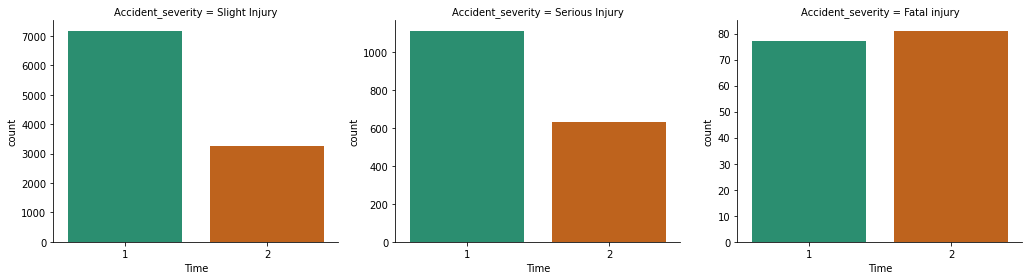

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


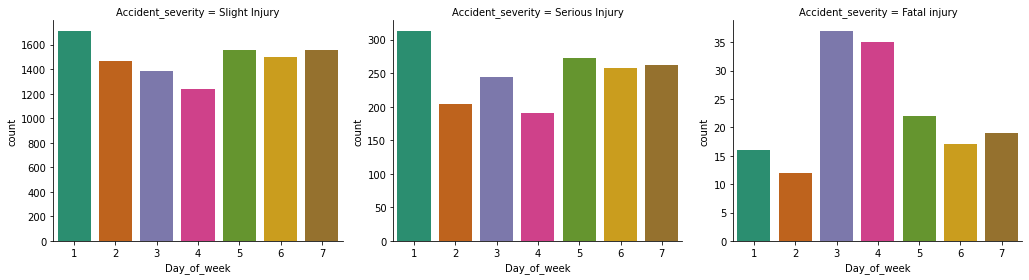

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


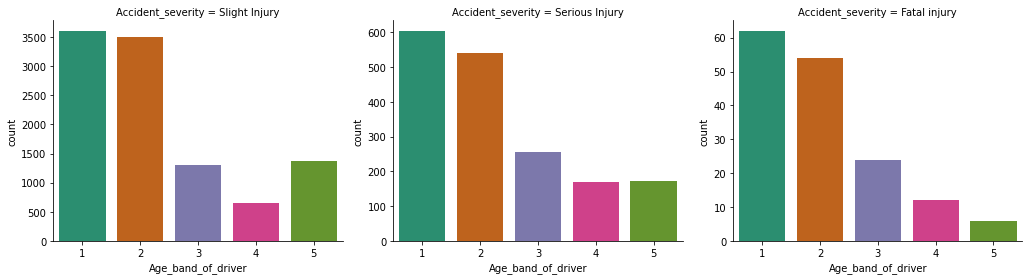

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


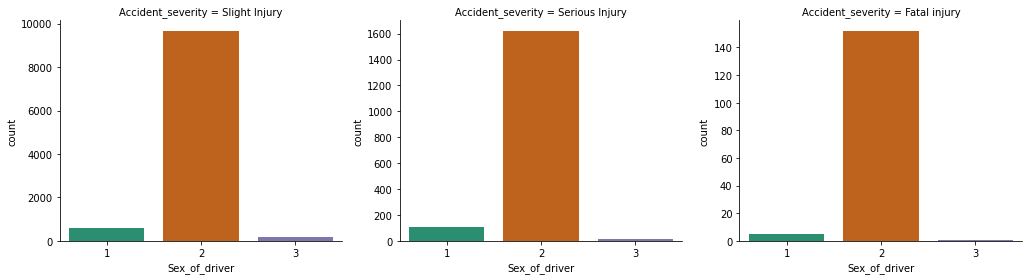

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


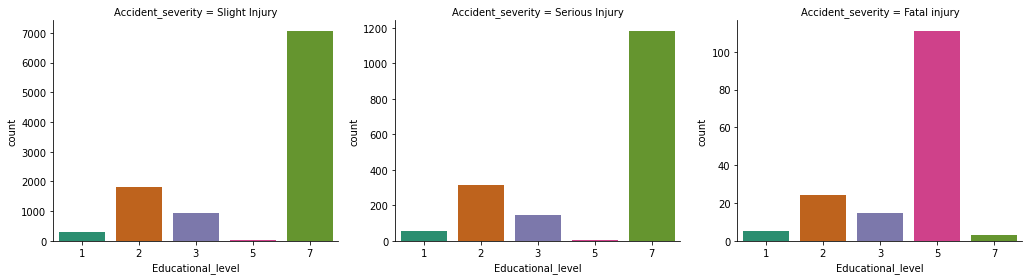

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


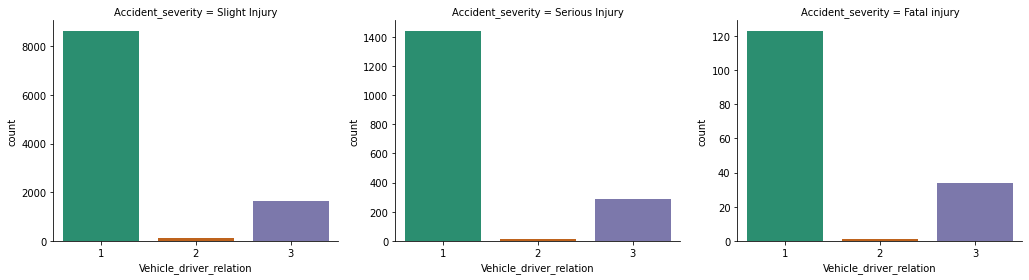

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


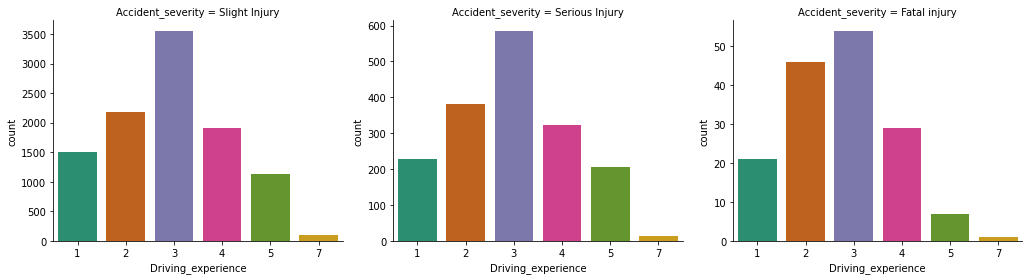

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


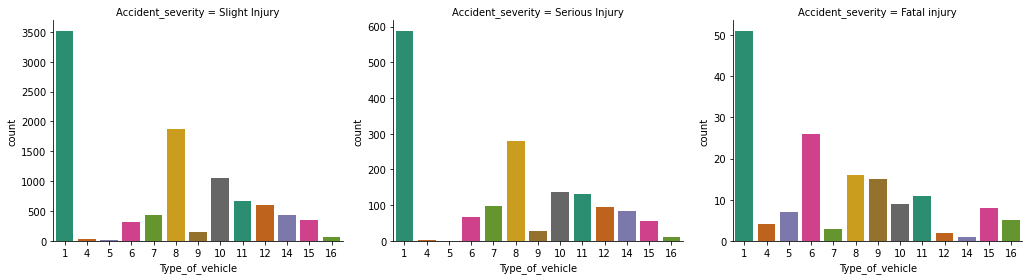

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


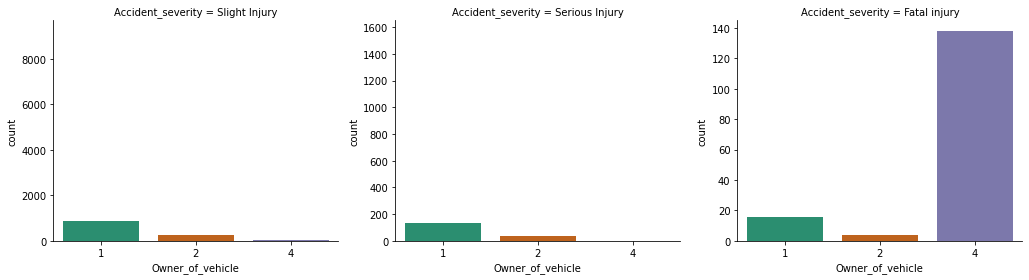

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


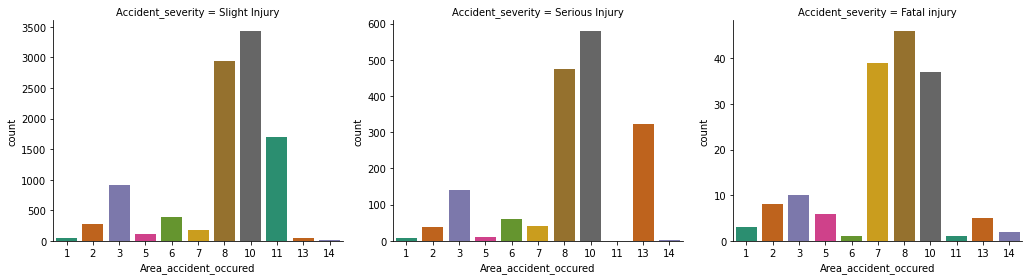

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


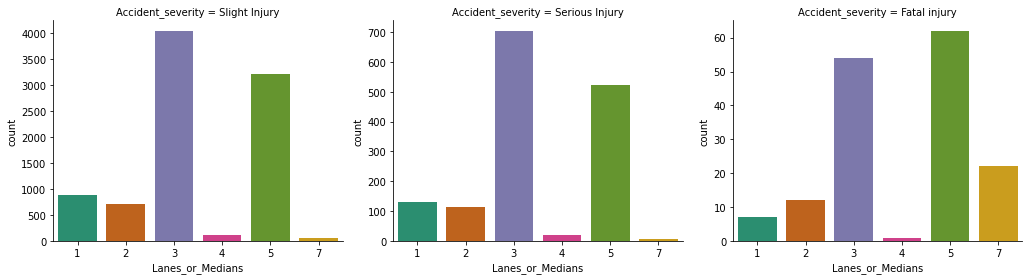

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


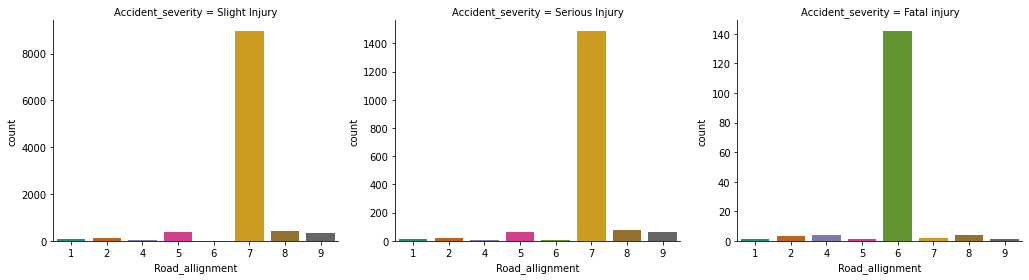

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


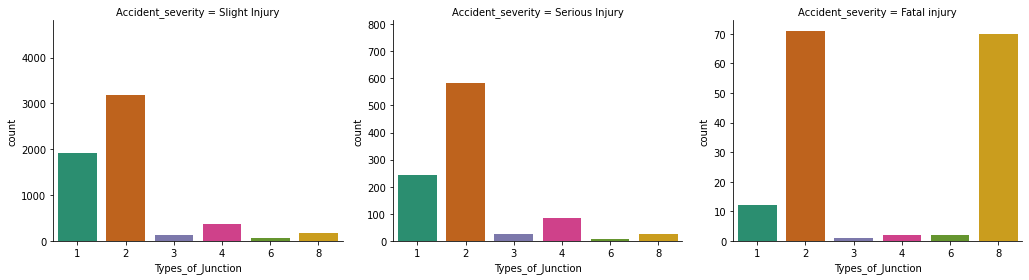

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


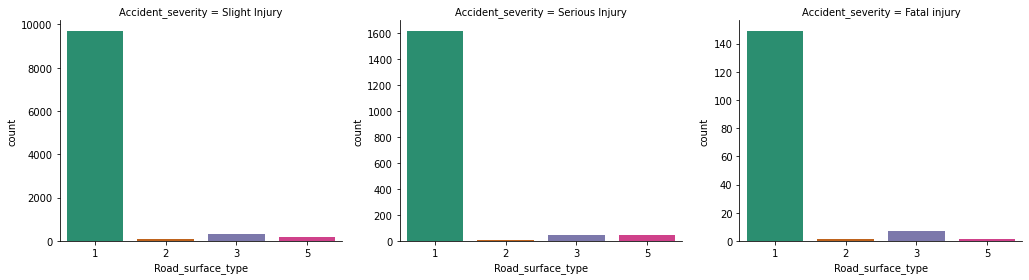

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


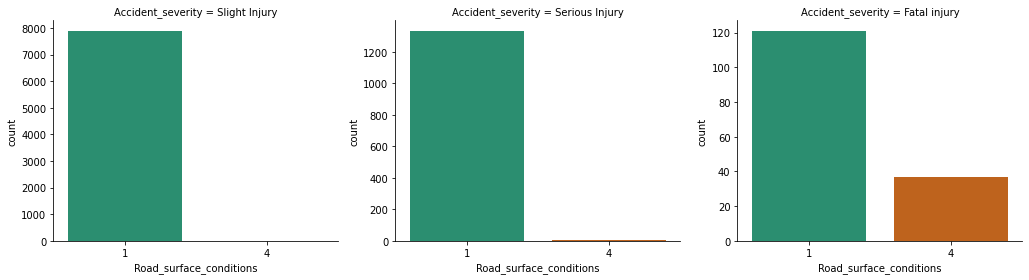

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


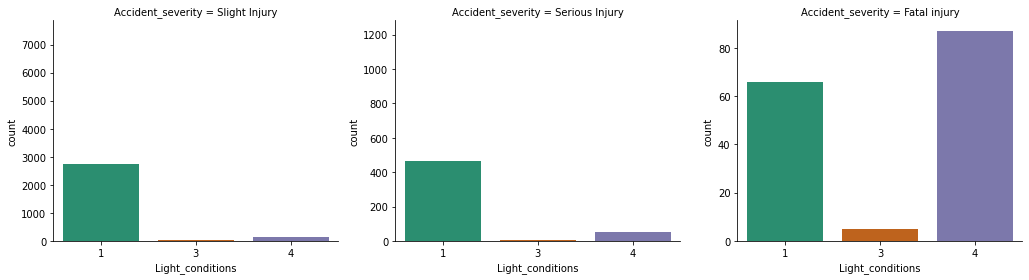

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


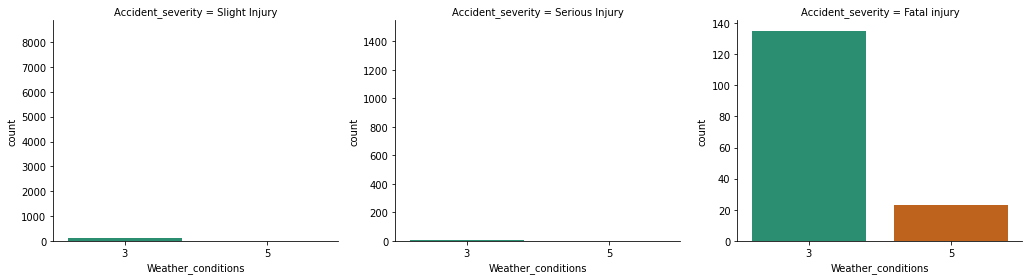

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


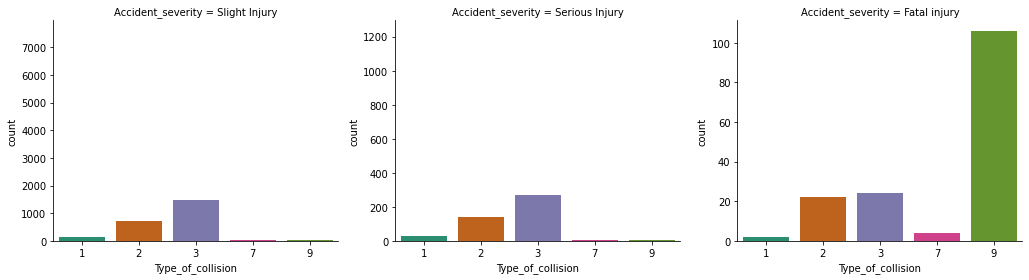

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


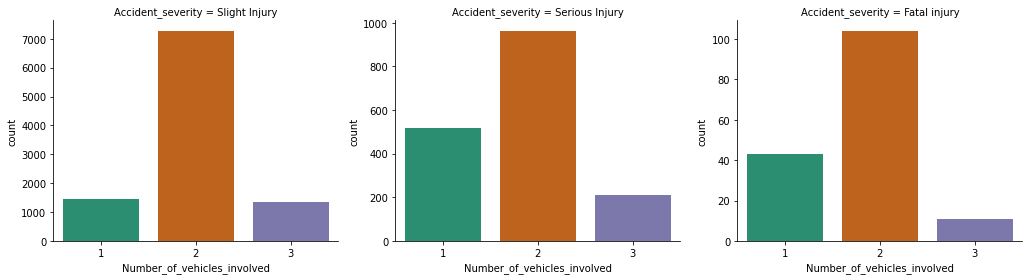

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


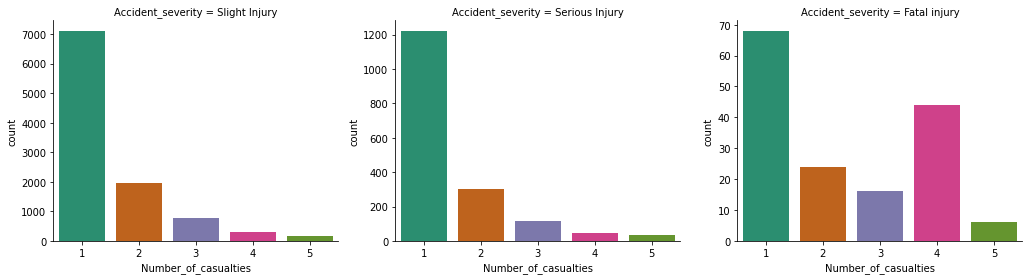

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


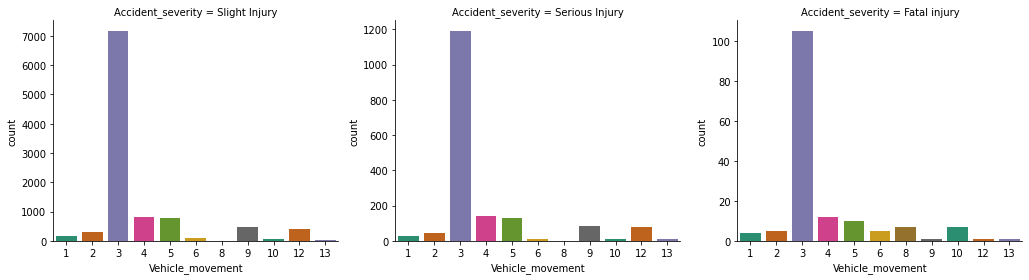

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


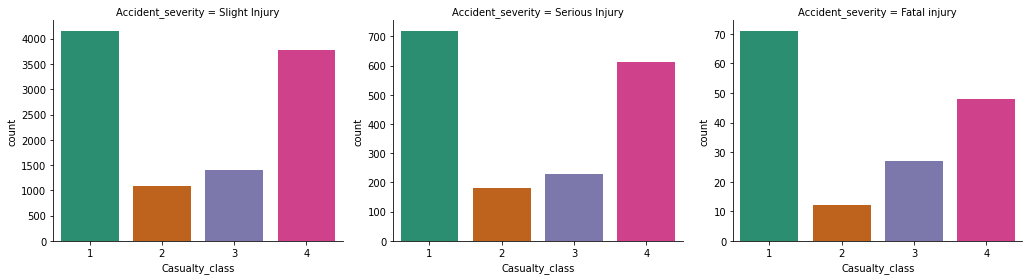

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


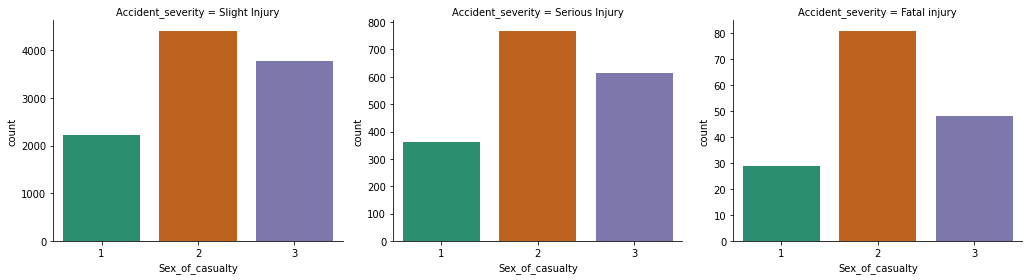

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


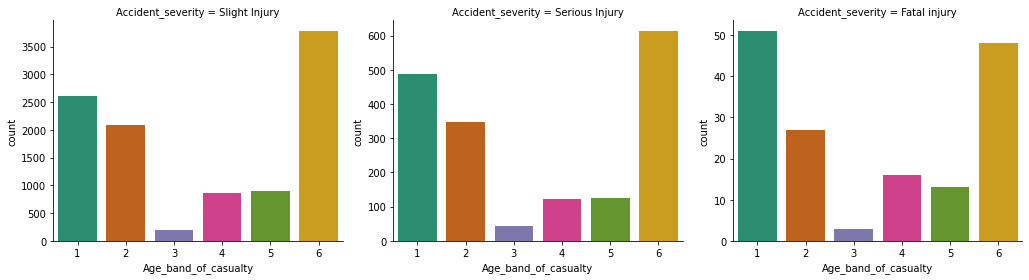

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


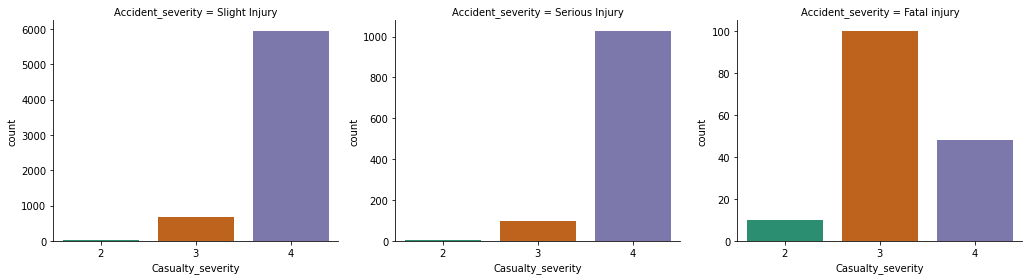

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


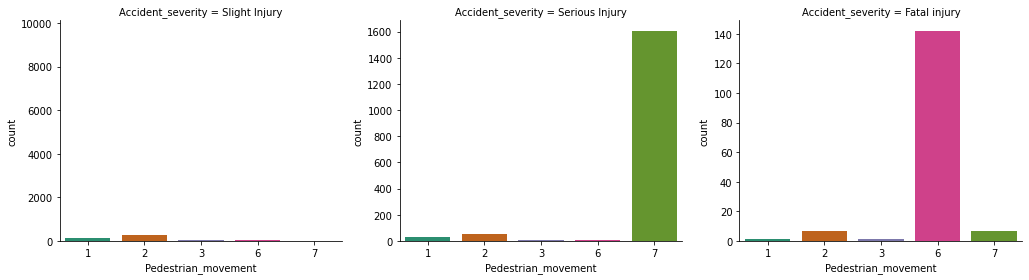

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


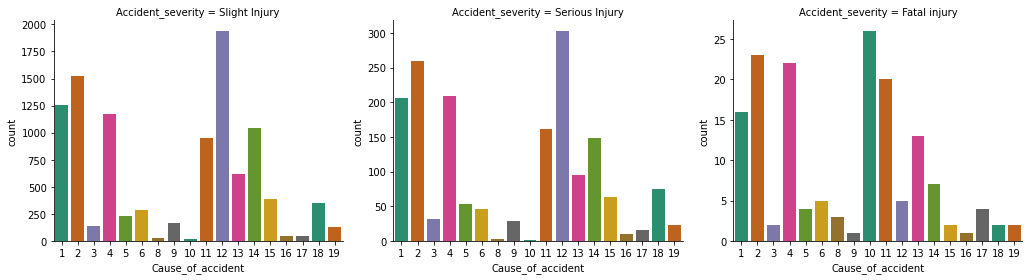

In [40]:
for col in df_rta.drop('Accident_severity', axis=1):
    g = sns.FacetGrid(df_rta, col='Accident_severity', height=4, aspect=1.2, sharey=False)
    g.map(sns.countplot, col, palette = 'Dark2')
    plt.show()

In [41]:
df_rta.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,12316.0,1.321127,0.466928,1.0,1.0,1.0,2.0,2.0
Day_of_week,12316.0,3.980513,2.059712,1.0,2.0,4.0,6.0,7.0
Age_band_of_driver,12316.0,2.292952,1.337520,1.0,1.0,2.0,3.0,5.0
Sex_of_driver,12316.0,1.957535,0.263767,1.0,2.0,2.0,2.0,3.0
Educational_level,12316.0,4.208347,1.361538,1.0,3.0,5.0,5.0,7.0
Vehicle_driver_relation,12316.0,1.333793,0.741375,1.0,1.0,1.0,1.0,4.0
Driving_experience,12316.0,2.943732,1.236146,1.0,2.0,3.0,4.0,7.0
Type_of_vehicle,12316.0,6.100357,4.548810,1.0,1.0,6.0,9.0,17.0
Owner_of_vehicle,12316.0,3.693975,0.877637,1.0,4.0,4.0,4.0,4.0
Area_accident_occured,12316.0,7.439591,2.349455,1.0,7.0,8.0,8.0,14.0


In [42]:
df_rta.cov()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident
Time,0.218022,-0.045630,0.001898,-0.005120,-0.000407,0.003723,0.002967,-0.022080,-0.001679,0.003932,...,-0.005553,-0.005777,0.038008,-0.014727,0.001103,0.002240,0.011532,0.000042,0.002384,-0.019566
Day_of_week,-0.045630,4.242414,0.055080,0.005425,-0.012667,0.005043,-0.025620,-0.022648,0.002562,0.015875,...,0.016995,-0.007730,-0.103812,-0.117134,0.018266,0.002235,-0.015913,0.001830,0.000459,0.110503
Age_band_of_driver,0.001898,0.055080,1.788959,-0.124140,0.024790,-0.005792,-0.022167,0.029388,0.006345,0.036050,...,0.001810,0.001509,-0.073384,-0.018056,0.009590,0.011283,0.000122,0.002803,0.000444,-0.004798
Sex_of_driver,-0.005120,0.005425,-0.124140,0.069573,0.001784,0.002158,0.003213,-0.004508,-0.002197,-0.000170,...,-0.008280,-0.006805,0.012885,0.003830,0.001171,-0.001184,0.007939,0.000384,0.001645,-0.000805
Educational_level,-0.000407,-0.012667,0.024790,0.001784,1.853787,-0.077589,0.096986,0.033738,-0.014920,-0.021924,...,-0.035183,0.011273,0.005071,0.011898,0.009755,0.007567,0.023757,0.003961,0.000215,-0.003132
Vehicle_driver_relation,0.003723,0.005043,-0.005792,0.002158,-0.077589,0.549637,0.015292,-0.011739,0.009668,0.038314,...,-0.011257,0.004070,0.013606,0.008589,-0.002780,-0.000366,0.012761,-0.001407,0.010469,-0.040671
Driving_experience,0.002967,-0.025620,-0.022167,0.003213,0.096986,0.015292,1.528056,0.080597,0.000156,-0.000842,...,0.042383,-0.006786,-0.008862,0.012192,-0.004580,-0.000197,-0.028555,-0.003598,-0.020756,-0.048736
Type_of_vehicle,-0.022080,-0.022648,0.029388,-0.004508,0.033738,-0.011739,0.080597,20.691673,-0.049757,-0.081554,...,0.321390,0.003462,0.013844,0.101453,-0.037036,-0.037998,-0.086198,-0.004490,0.042681,-0.097461
Owner_of_vehicle,-0.001679,0.002562,0.006345,-0.002197,-0.014920,0.009668,0.000156,-0.049757,0.770247,-0.045244,...,0.000648,0.005061,-0.003981,0.040240,0.003734,0.004781,0.021720,0.005425,0.018444,0.074102
Area_accident_occured,0.003932,0.015875,0.036050,-0.000170,-0.021924,0.038314,-0.000842,-0.081554,-0.045244,5.519940,...,-0.025244,-0.025879,-0.011098,0.022675,0.035424,0.018402,0.039871,0.020112,0.001992,-0.114938


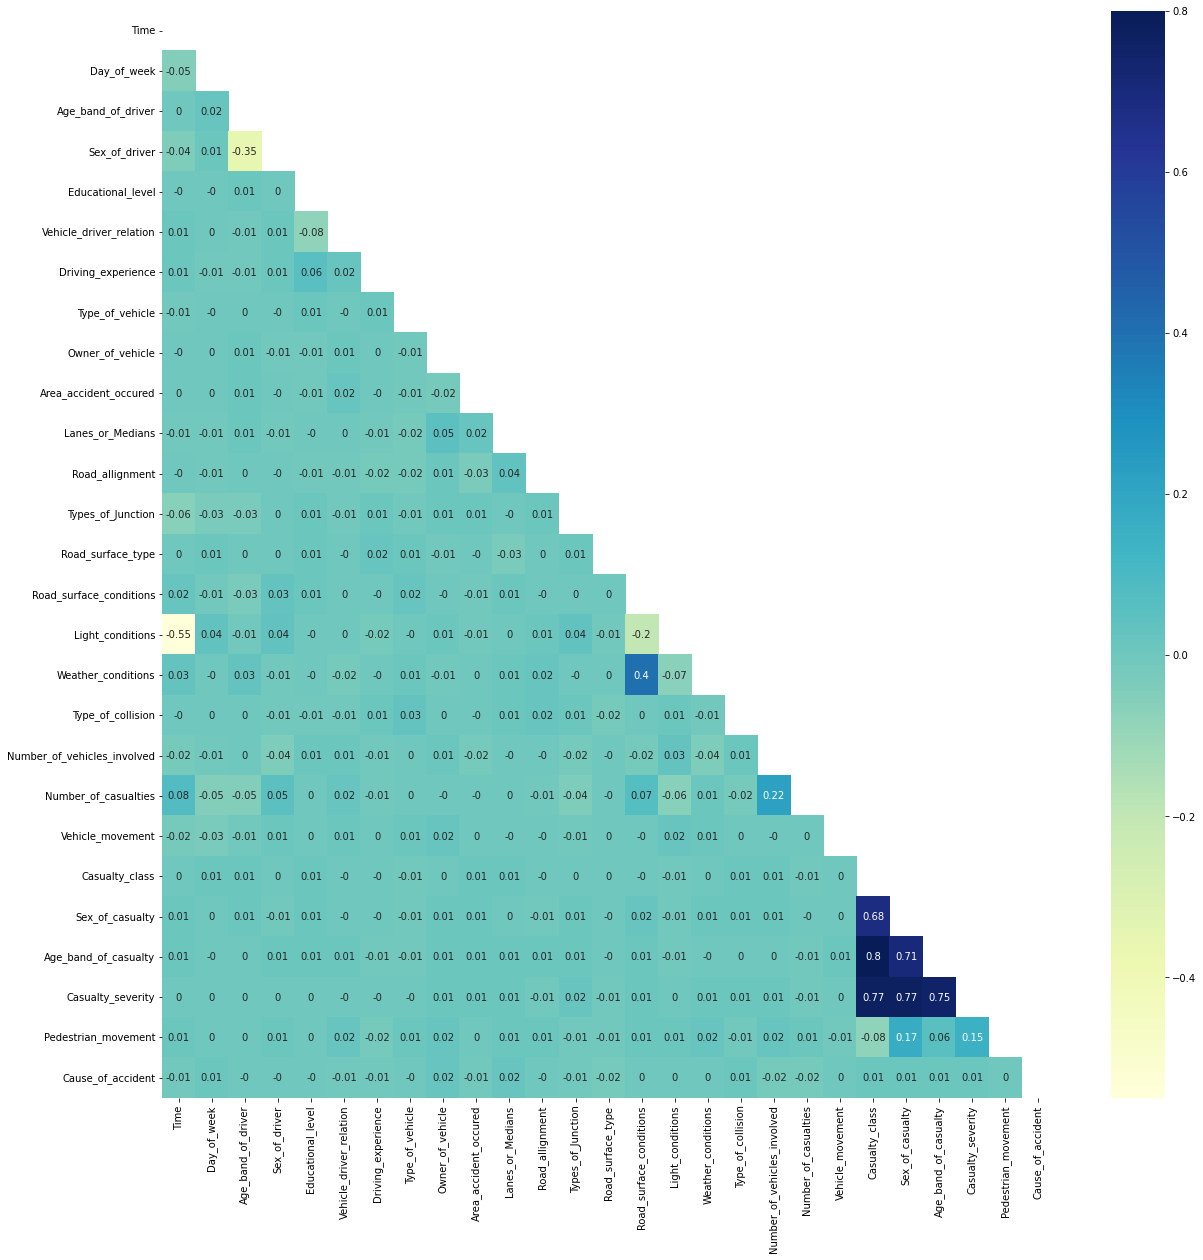

In [43]:
plt.figure(figsize=(20,20))
covv = np.triu(np.ones_like(df_rta.corr(), dtype=bool))
sns.heatmap(df_rta.corr().round(2), annot = True, cmap="YlGnBu", mask =covv)

In [44]:
df_rta.to_csv("Cleaned_Data_LabelEncode.csv", index = False)

## Oversampling the imbalance data using SMOTE(Sythetic Minority oversmapling technique)

In [45]:
from sklearn.model_selection import train_test_split

X = df_rta.drop(["Accident_severity"], axis = 1)
y = df_rta["Accident_severity"]

In [46]:
target_class = ['Fatal Injury','Serious Injury', 'Slight Injury']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,stratify = y, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 27) (3695, 27) (8621,) (3695,)


## Target distribution before upsampling

Class= Slight Injury, n=7290 (84.56%)
Class= Fatal injury, n=111 (1.29%)
Class= Serious Injury, n=1220 (14.15%)


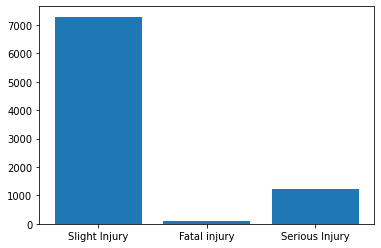

In [48]:
from collections import Counter
counter = Counter(y_train)
for k,v in counter.items():
    percentage = v / len(y_train) * 100
    print(f"Class= {k}, n={v} ({percentage:.2f}%)")
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()


Class= Slight Injury, n=7290 (33.33%)
Class= Fatal injury, n=7290 (33.33%)
Class= Serious Injury, n=7290 (33.33%)


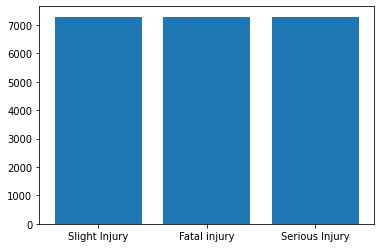

In [49]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
counter = Counter(y_train)
for k,v in counter.items():
    percentage = v / len(y_train) * 100
    print(f"Class= {k}, n={v} ({percentage:.2f}%)")
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [50]:
y_test = ordinal_encoder(pd.DataFrame(y_test, columns = ['Accident_severity']), pd.DataFrame(y_test, columns = ['Accident_severity']).columns)['Accident_severity']
y_train = ordinal_encoder(pd.DataFrame(y_train, columns = ['Accident_severity']), pd.DataFrame(y_train, columns = ['Accident_severity']).columns)['Accident_severity']

## BaseModel Fitting

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

In [52]:
import sklearn
sklearn.__version__

'1.0.2'

In [53]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('Xtree', ExtraTreesClassifier()))
models.append(('ada', AdaBoostClassifier()))
models.append(('gradboost', GradientBoostingClassifier()))
models.append(('XGB', XGBClassifier()))

In [54]:
num_folds = 5
seed = 10
scoring = 'accuracy'

In [55]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, shuffle=True,random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.587700 (0.001739)
KNN: 0.824417 (0.002398)
NB: 0.542524 (0.004984)
SVM: 0.803978 (0.004210)
DT: 0.839872 (0.007969)
RF: 0.923503 (0.002850)
Xtree: 0.939826 (0.001920)
ada: 0.674668 (0.004685)
gradboost: 0.785231 (0.007672)
XGB: 0.758299 (0.005616)


## Training through Random Forest Classifier

In [56]:
Rtree = RandomForestClassifier()
Rtree.fit(X_train, y_train)
y_pred = Rtree.predict(X_test)

In [61]:
## Showing the Matrics
def model_evaluation(model,y_test,y_pred):
  Accuracy  =  accuracy_score(y_test, y_pred)
  Precision =  precision_score(y_test, y_pred, average= 'weighted')
  Recall    =  recall_score(y_test, y_pred, average= 'weighted')
  F1_score  =  f1_score(y_test, y_pred, average= 'weighted')
  show_metrics = pd.DataFrame({'Metrics' : ['Accuracy','Precision','Recall','F1_score'], 
                               'Score': [Accuracy , Precision, Recall, F1_score]})
  show_metrics = show_metrics
  return show_metrics

In [62]:
model_evaluation(Rtree, y_test, y_pred)

,Metrics,Score
0,Accuracy,0.808119
1,Precision,0.771881
2,Recall,0.808119
3,F1_score,0.787038


In [59]:
model_evaluation(Rtree,y_test,y_pred)
Rtree.score(X_train, y_train)

1.0

In [63]:
Rtree.score(X_test,y_test)

0.8081190798376184

## Hyperparameter Tuning

In [65]:
kf2 = KFold(n_splits = 5,shuffle=True,random_state=25).split(X=X_train,y=y_train)
# paramgrid
params = {
    'n_estimators' : range(400,1000,100),
    'max_depth': [15,20],
    'min_samples_split': [2,3],
    'class_weight': ['balanced', None]
}

rt2  = RandomForestClassifier(ccp_alpha=0.0,
                                        criterion='gini',
                                        max_depth=15,
                                        min_samples_split=3,
                                        n_estimators=400)

gs2 = GridSearchCV(
    estimator= rt2,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=kf2,
    verbose=3,
)

rt_model_2 = gs2.fit(X=X_train, y=y_train)
(gs2.best_params_, gs2.best_score_)




Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


({'class_weight': 'balanced',
  'max_depth': 20,
  'min_samples_split': 2,
  'n_estimators': 900},
 0.9225614603426433)

In [66]:
rt_model_2.score(X_train, y_train)

0.9975765592823601

In [69]:
rt_model_2.score(X_test,y_test)

0.7848138965485976

In [70]:
  y_pred = rt_model_2.predict(X_test)

In [71]:
model_evaluation(rt_model_2, y_test,y_pred)

,Metrics,Score
0,Accuracy,0.803248
1,Precision,0.770918
2,Recall,0.803248
3,F1_score,0.784814


In [72]:
rt3 = RandomForestClassifier(ccp_alpha=0.0,
                                        criterion='gini',
                                        max_depth=35,
                                        min_samples_split=2,
                                        n_estimators=900,
                                       class_weight ='balanced')

rt_model_3 = rt3.fit(X=X_train, y=y_train)

In [73]:
rt_model_3

RandomForestClassifier(class_weight='balanced', max_depth=35, n_estimators=900)

In [74]:
y_pred = rt_model_3.predict(X_train)
model_evaluation(rt_model_3, y_train,y_pred)

,Metrics,Score
0,Accuracy,1.0
1,Precision,1.0
2,Recall,1.0
3,F1_score,1.0
